# The rise in the demand of online food delivery in the metropolitan city Bangalore - analyzing using Python

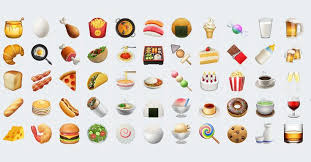

Analysing online food delivery preferences using the factors that affect it in positive and negative ways.

## Context -

There has been a rise in the demand of online delivery in the metropolitan cities such as Bangalore in India. The question about why this increase in the demand has always been increasing is an important question. So a survey is conducted using the data from Kaggle.

## The Analysis -

### 1) Importing libraries and understanding the dataset :

In [1]:
#importing libraries-

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# the dataset to be used-

food_delivery=pd.read_csv("../input/online-food-delivery-preferencesbangalore-region/onlinedeliverydata.csv")

In [3]:
# the dataset-

food_delivery.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [4]:
# printing the complete dataset-

print(food_delivery.head())

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  ...  \
0              Post Graduate            4   12.9766    77.5993    560001  ...   
1                   Graduate            3   12.9770    77.5773    560009  ...   
2              Post Graduate            3   12.9551    77.6593    560017  ...   
3                   Graduate            6   12.9473    77.5616    560019  ...   
4              Post Graduate            4   12.9850    77.5533    560010  ...   

     Less Delivery time High Quality of package       Number of calls  \
0  Moderately Important    Moderately Important  Moderately Important   
1     

In [5]:
#shape of dataset-

food_delivery.shape

(388, 55)

Inference-

The dataset hass 388 rows and 55 columns.

In [6]:
# information regarding dataset-

food_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

Inference-

The dataset has datatype:
2 columns of float type

3 columns integer type

50 columns object type.

The entries-388 

In [7]:
#describing numerical columns-

food_delivery.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


Inference-

Age,family size,latitude,longitude and pin code are the numerical columns described above along with their mean,min and max.

### 2) Cleaning the dataset :

#### a) Checking null values if present-

In [8]:
# percentage of null values-

round(100*(food_delivery.isnull().sum()/len(food_delivery.index)).sort_values(ascending = False),2)

Age                                          0.0
Good Road Condition                          0.0
Long delivery time                           0.0
Delay of delivery person getting assigned    0.0
Delay of delivery person picking up food     0.0
Wrong order delivered                        0.0
Missing item                                 0.0
Order placed by mistake                      0.0
Influence of time                            0.0
Order Time                                   0.0
Maximum wait time                            0.0
Residence in busy location                   0.0
Google Maps Accuracy                         0.0
Low quantity low time                        0.0
Unavailability                               0.0
Delivery person ability                      0.0
Influence of rating                          0.0
Less Delivery time                           0.0
High Quality of package                      0.0
Number of calls                              0.0
Politeness          

Inference-

There are no null values present in the dataset.

#### b) checking for duplicate values-

In [9]:
# the duplicate values-

duplicate=food_delivery[food_delivery.duplicated()] 
duplicate

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
48,23,Female,Single,Student,No Income,Graduate,3,12.9820,77.6256,560008,...,Important,Very Important,Slightly Important,Important,Very Important,Very Important,Very Important,Important,Yes,"Spillage, bad packaging and missing items"
49,22,Female,Single,Student,10001 to 25000,Post Graduate,5,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
68,23,Female,Single,Student,No Income,Post Graduate,4,13.0487,77.5923,560024,...,Important,Important,Moderately Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
77,21,Male,Single,Student,No Income,Graduate,4,12.9770,77.5773,560009,...,Important,Important,Slightly Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
86,24,Male,Single,Student,No Income,Post Graduate,5,12.9337,77.5900,560011,...,Unimportant,Slightly Important,Unimportant,Very Important,Slightly Important,Slightly Important,Slightly Important,Slightly Important,Yes,NIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,...,Important,Important,Important,Important,Important,Important,Important,Important,Yes,Nil
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,...,Moderately Important,Very Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Very Important,Very Important,Yes,Nil
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,...,Important,Very Important,Important,Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,...,Important,Very Important,Important,Very Important,Very Important,Important,Very Important,Very Important,Yes,Language barrier is also one major issue. Mosl...


Inference-

THere are duplicate values present in 102 rows.

In [10]:
# removing duplicate values-

food_delivery.drop_duplicates(inplace=True)

In [11]:
#checking if any duplicate values left-

duplicate=food_delivery[food_delivery.duplicated()] 
duplicate

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews


Inference-

No duplicate values present.

In [12]:
#checking shape after removal of duplicate values-

food_delivery.shape

(286, 55)

Inference-

Out of 388 rows ,now 286 rows left.

#### c) Checking the unstructured column "Reviews"-

In [13]:
# checking the values present-

food_delivery['Reviews'].value_counts(dropna=False)

NIL                                                                                                                                                   59
Nil                                                                                                                                                   35
nil                                                                                                                                                    4
No                                                                                                                                                     4
BEST BEST BEST !! WONDERFUL WONDERFUL !! FAST FAST FAST !!                                                                                             3
                                                                                                                                                      ..
I'm satisfied with the service and swiggy is the best                             

Inference-

Most of the reviews are null which means either the customer did not fill it or filled it in a format not suitable for the analysis.

So it needs to be structured first by replacing null values with "Not Specified".

In [14]:
# replacing null values with the "Not Specified"-

food_delivery['Reviews'] = food_delivery['Reviews'].replace({"NIL": 'Not Specified',"Nil":"Not Specified","nil":"Not Specified"})

In [15]:
# checking the column after replacement-

food_delivery['Reviews'].value_counts()

Not Specified                                                                                                                                         98
No                                                                                                                                                     4
BEST BEST BEST !! WONDERFUL WONDERFUL !! FAST FAST FAST !!                                                                                             3
Very few times I have  had bad experienced by aggregator or restaurant                                                                                 2
My entire family loves swiggy                                                                                                                          2
                                                                                                                                                      ..
I'm satisfied with the service and swiggy is the best                             

### 3) Exploratory Data Analysis :

Demographic data is the main point of interest i.e the are the target variable.The reason is that these variables have direct relationship with the online food delivery business which itself runs successfully because of them.

#### a) Analyzing the target variables -

Demographic data-

the columns to be included in it-age,gender,marital status,occupation,monthly income,family size,education

In [16]:
#checking the distinct values present in the age column-

food_delivery["Age"].value_counts()

23    48
22    42
25    41
24    39
26    27
21    16
27    15
28    12
32    12
30     8
20     7
31     7
29     6
19     4
18     1
33     1
Name: Age, dtype: int64

Inference-

These values need to be binned because only then it will give clear picture in the analysis.

In [17]:
# binning column into bins-

food_delivery['Age_group'] = pd.cut(food_delivery['Age'],bins = [15,20,25,30,35,40], labels = ['15-20y','20-25y','25-30y','30-35y','35-40y'])

In [18]:
#checking values after binning-

food_delivery["Age_group"].value_counts()

20-25y    186
25-30y     68
30-35y     20
15-20y     12
35-40y      0
Name: Age_group, dtype: int64

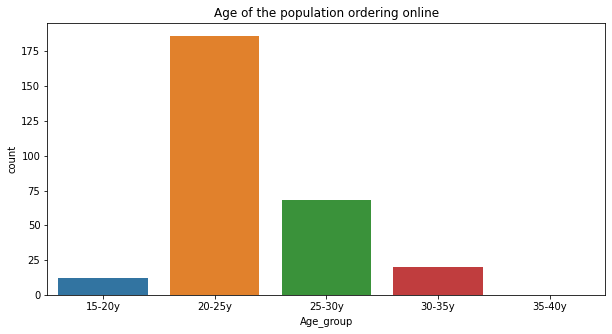

In [19]:
#plotting the age_group column to analyse the values distribution in it-

plt.figure(figsize=(10,5))

plt.title('Age of the population ordering online')
sns.countplot(x='Age_group',data=food_delivery)
plt.show()

Inference-

The age group 20-25 years old is the one that needs to be targeted because this group is the one that orders the most.
The group 25-30 years old needs to be studied much better because this group has the ability to increase revenue as it is second most age group that orders the most.

In [20]:
# Gender column values-

food_delivery["Gender"].value_counts()

Male      164
Female    122
Name: Gender, dtype: int64

In [21]:
# checking the percentage of male and females ordering online-

round(100*(food_delivery["Gender"].value_counts()/len(food_delivery.index)).sort_values(ascending = False),2)

Male      57.34
Female    42.66
Name: Gender, dtype: float64

Inference-

57.34% males and 42.66% female orders online.

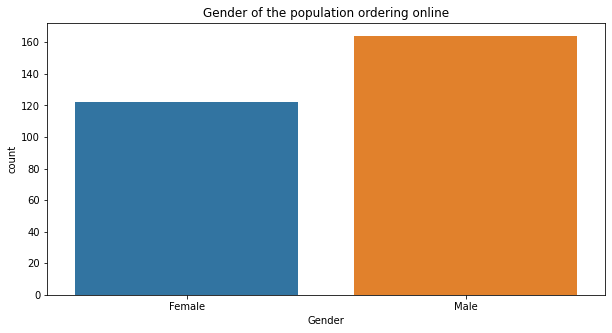

In [22]:
# plotting the Gender graph-

plt.figure(figsize=(10,5))

plt.title('Gender of the population ordering online')
sns.countplot(x='Gender',data=food_delivery)
plt.show()

Inference-

Male orders more than female.

Reason-

1)Bachelor

2)Living away from family

3)Hectic schedule

In [23]:
# Marital status-

food_delivery["Marital Status"].value_counts()

Single               192
Married               85
Prefer not to say      9
Name: Marital Status, dtype: int64

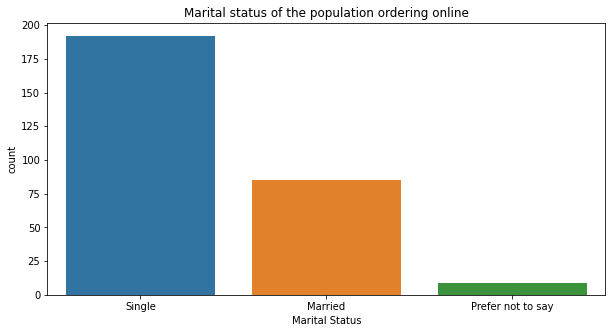

In [24]:
# Plotting the graph-

plt.figure(figsize=(10,5))

plt.title('Marital status of the population ordering online')
sns.countplot(x='Marital Status',data=food_delivery)
plt.show()

Inference-

Maximum online order comes from single followed by married.

Reason for more order by single people-

1)Sharing the flat with a number of people and in that scenario they prefer to order online than cooking as the cook cannot always cook different types of food for different people.

2)Too much workload.

3)Off days people prefer to relax.


In [25]:
#Occupation values-

food_delivery["Occupation"].value_counts()

Student           147
Employee           93
Self Employeed     37
House wife          9
Name: Occupation, dtype: int64

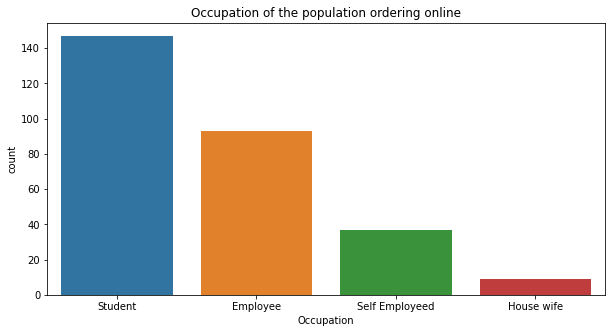

In [26]:
#Occupation graph-

plt.figure(figsize=(10,5))

plt.title('Occupation of the population ordering online')
sns.countplot(x='Occupation',data=food_delivery)
plt.show()

Inference-

Students then followed by employee order the most and minimum is housewife.

Reason-

1)staying away from family

2)deadline to complete the work

3)lack cooking skills

In [27]:
# Monthly income values-

food_delivery["Monthly Income"].value_counts()

No Income          135
25001 to 50000      50
More than 50000     47
10001 to 25000      36
Below Rs.10000      18
Name: Monthly Income, dtype: int64

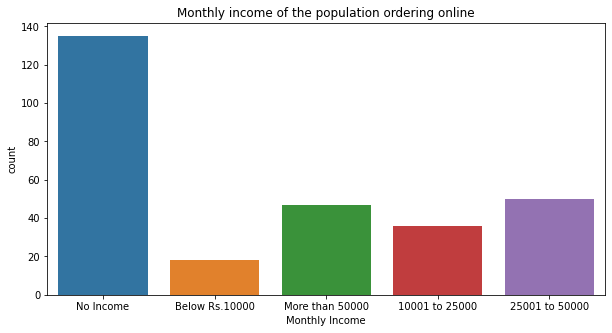

In [28]:
#plotting monthly income column-

plt.figure(figsize=(10,5))

plt.title('Monthly income of the population ordering online')
sns.countplot(x='Monthly Income',data=food_delivery)
plt.show()

Inference-

People with no income order most as in occupation graph we saw that it was the students who ordered most. So a student does not have income. After the students there were employee earning more than 25 thousand but less than 50 thousand order the most.

In [29]:
#The educational qualification-

food_delivery["Educational Qualifications"].value_counts()

Post Graduate    130
Graduate         122
Ph.D              21
School            11
Uneducated         2
Name: Educational Qualifications, dtype: int64

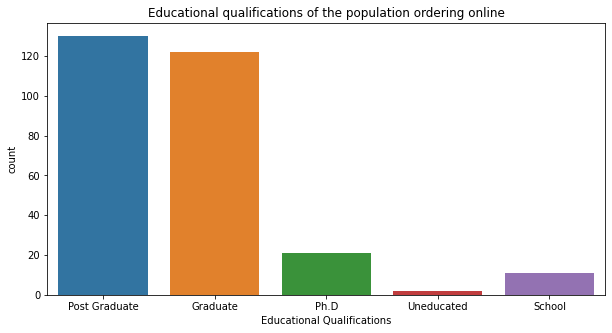

In [30]:
#the graph-

plt.figure(figsize=(10,5))

plt.title('Educational qualifications of the population ordering online')
sns.countplot(x='Educational Qualifications',data=food_delivery)
plt.show()

Inference-

As most students order online. After analysing their qualifications it was found that the post graduate students ordered the most.

Reason-

1)burden of examination,thesis ,etc.

2)looking for job.

In [31]:
#family size column-

food_delivery["Family size"].value_counts()

3    89
2    74
4    44
5    39
6    22
1    18
Name: Family size, dtype: int64

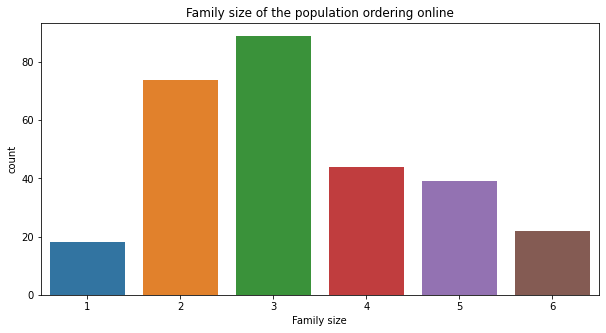

In [32]:
#graph-

plt.figure(figsize=(10,5))

plt.title('Family size of the population ordering online')
sns.countplot(x='Family size',data=food_delivery)
plt.show()

Inference-

Family size of three ordered the most.This column can be set aside as it does not present clear picture as other columns present among themselves.

In [33]:
#checking the dataset again-

food_delivery.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews,Age_group
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n,15-20y
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Not Specified,20-25y
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so...",20-25y
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,Not Specified,20-25y
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,Not Specified,20-25y


#### b) Effect of different variables on the target columns -

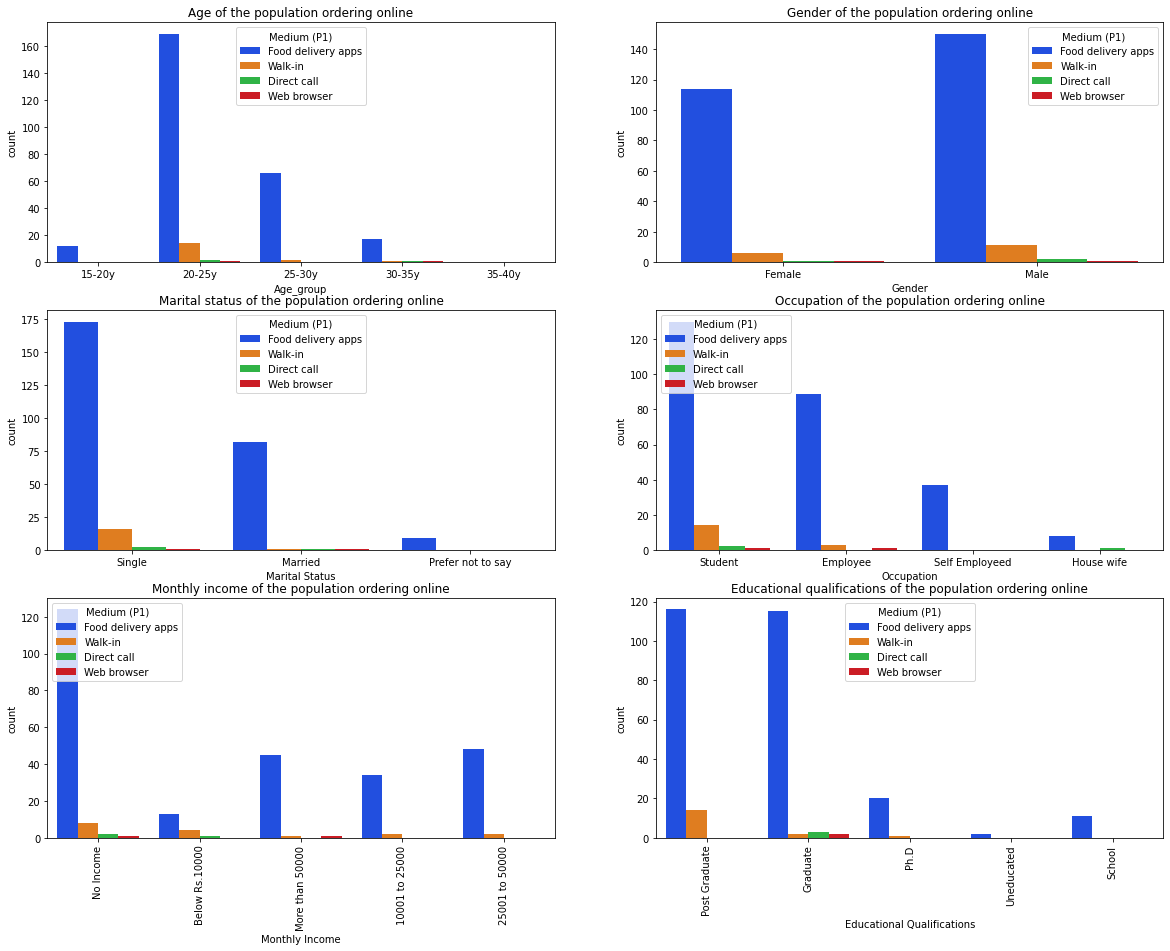

In [34]:
#Medium(p1) column-

plt.figure(figsize=(20,15))


ax1=plt.subplot(3, 2, 1)
ax1=sns.countplot(food_delivery['Age_group'], hue=food_delivery["Medium (P1)"],data=food_delivery,palette="bright")
ax1.set_xticklabels(ax1.get_xticklabels())
plt.title('Age of the population ordering online')


ax2=plt.subplot(3, 2, 2)
ax2=sns.countplot(food_delivery['Gender'],hue=food_delivery["Medium (P1)"],data=food_delivery ,palette="bright")
ax2.set_xticklabels(ax2.get_xticklabels())
plt.title('Gender of the population ordering online')

ax3=plt.subplot(3, 2, 3)
ax3=sns.countplot(food_delivery['Marital Status'],hue=food_delivery["Medium (P1)"],data=food_delivery ,palette="bright")
ax3.set_xticklabels(ax3.get_xticklabels())
plt.title('Marital status of the population ordering online')

ax4=plt.subplot(3, 2, 4)
ax4=sns.countplot(food_delivery['Occupation'],hue=food_delivery["Medium (P1)"],data=food_delivery ,palette="bright")
ax4.set_xticklabels(ax4.get_xticklabels())
plt.title('Occupation of the population ordering online')


ax5=plt.subplot(3, 2, 5)
ax5=sns.countplot(food_delivery['Monthly Income'],hue=food_delivery["Medium (P1)"],data=food_delivery ,palette="bright")
ax5.set_xticklabels(ax5.get_xticklabels(),rotation=90)
plt.title('Monthly income of the population ordering online')

ax6=plt.subplot(3, 2, 6)
ax6=sns.countplot(food_delivery['Educational Qualifications'], hue=food_delivery["Medium (P1)"],data=food_delivery,palette="bright")
ax6.set_xticklabels(ax6.get_xticklabels(),rotation=90)
plt.title('Educational qualifications of the population ordering online')

plt.show()

Inference-

Age_group:the age group 20-25myears old preferred to order food through food delivery apps.This means that to increase the revenue of the business or to start a business ,the attention should be to develop apps for ordering.
The reason is that this age group is gen next so they need everything fast and hassel free.So an app provides all.

Gender:Male and female both favour food delivery app as it saves time.The web browser,though online,is not smooth as app because one need to enter to many things in web browser to finally reach the food delivery platflorm.

Marital_status:Singles and married both prefer food delivery app as it saves time for them.

Occupation:Food delivery app is success because student and employee both are working on deadlines day and night so for eating out they have no time and energy left.And this app is helpful delivers the food at their home.

Monthly income:Students order most with no income on food delivery app because they can have cheap and affordable food along with the choices.

Educational qualification:Post graduate and graduates are the one who are burdened with the studies the most.So food delivery app is their saviour as it brings them food choices along with the affordibility.

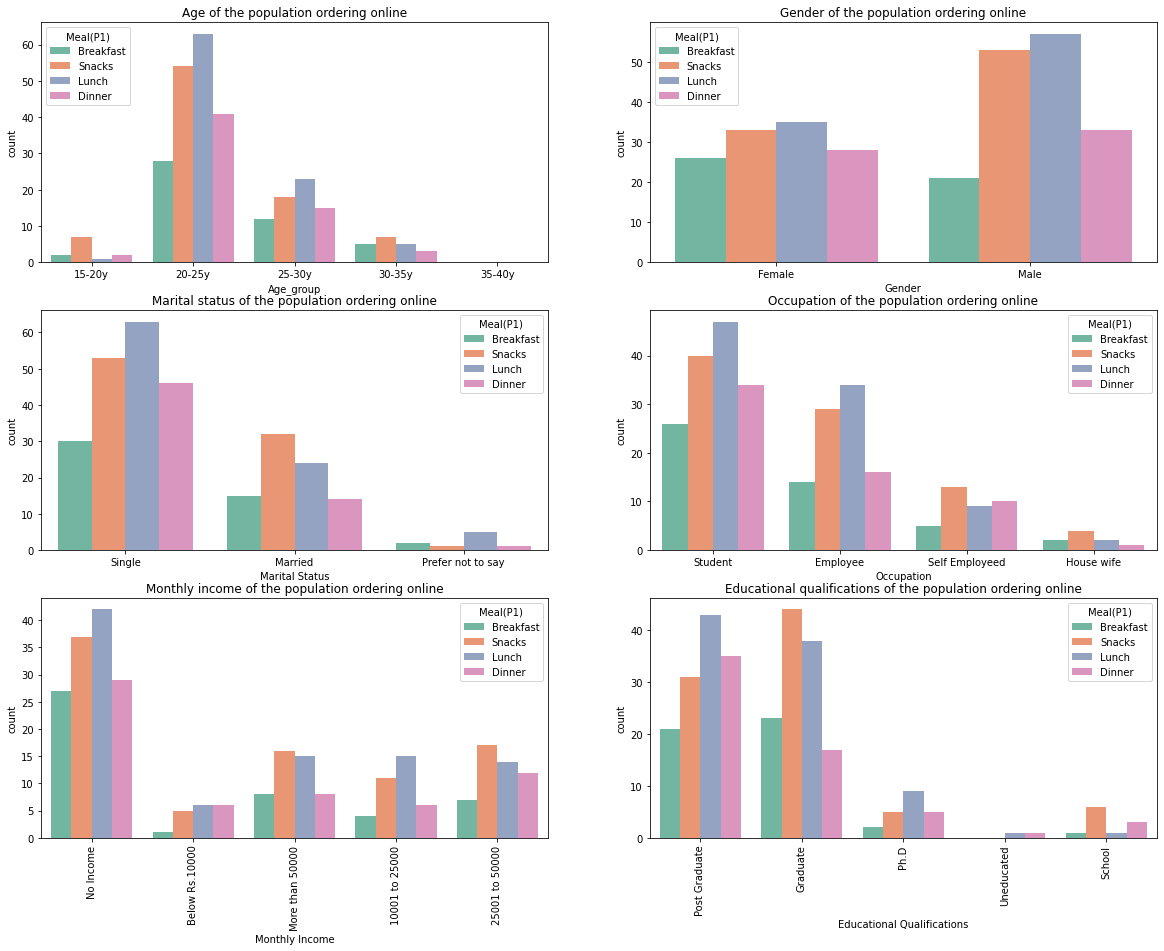

In [35]:
# Meal(p1)-

plt.figure(figsize=(20,15))


ax1=plt.subplot(3, 2, 1)
ax1=sns.countplot(food_delivery['Age_group'], hue=food_delivery["Meal(P1)"],data=food_delivery,palette="Set2")
ax1.set_xticklabels(ax1.get_xticklabels())
plt.title('Age of the population ordering online')


ax2=plt.subplot(3, 2, 2)
ax2=sns.countplot(food_delivery['Gender'],hue=food_delivery["Meal(P1)"],data=food_delivery ,palette="Set2")
ax2.set_xticklabels(ax2.get_xticklabels())
plt.title('Gender of the population ordering online')

ax3=plt.subplot(3, 2, 3)
ax3=sns.countplot(food_delivery['Marital Status'],hue=food_delivery["Meal(P1)"],data=food_delivery ,palette="Set2")
ax3.set_xticklabels(ax3.get_xticklabels())
plt.title('Marital status of the population ordering online')

ax4=plt.subplot(3, 2, 4)
ax4=sns.countplot(food_delivery['Occupation'],hue=food_delivery["Meal(P1)"],data=food_delivery ,palette="Set2")
ax4.set_xticklabels(ax4.get_xticklabels())
plt.title('Occupation of the population ordering online')


ax5=plt.subplot(3, 2, 5)
ax5=sns.countplot(food_delivery['Monthly Income'],hue=food_delivery["Meal(P1)"],data=food_delivery ,palette="Set2")
ax5.set_xticklabels(ax5.get_xticklabels(),rotation=90)
plt.title('Monthly income of the population ordering online')

ax6=plt.subplot(3, 2, 6)
ax6=sns.countplot(food_delivery['Educational Qualifications'], hue=food_delivery["Meal(P1)"],data=food_delivery,palette="Set2")
ax6.set_xticklabels(ax6.get_xticklabels(),rotation=90)
plt.title('Educational qualifications of the population ordering online')

plt.show()

Inference-

Lunch followed by snacks are the most ordered one in all the cases.The reason being time-starved and convenience-seeking consumers showing a growing appetite.

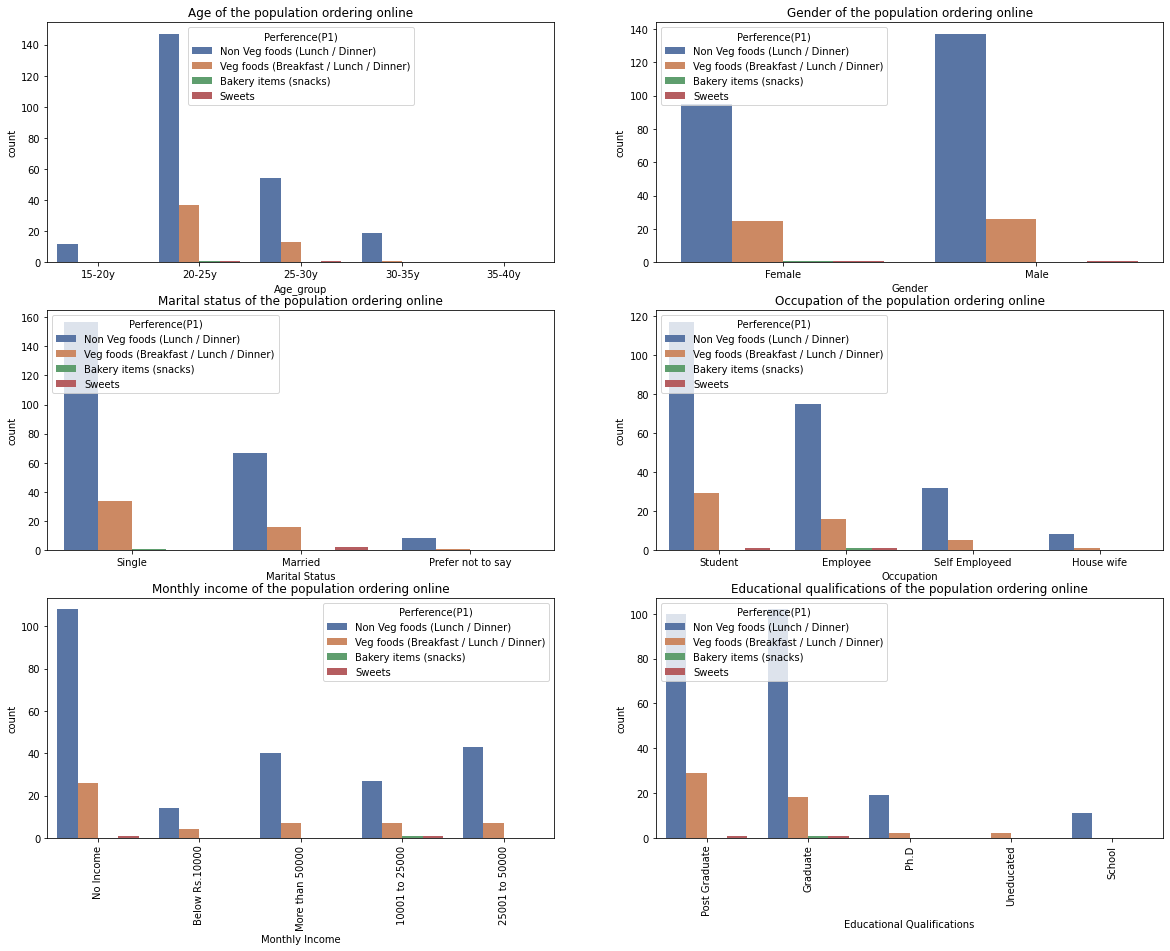

In [36]:
#Perference-

plt.figure(figsize=(20,15))


ax1=plt.subplot(3, 2, 1)
ax1=sns.countplot(food_delivery['Age_group'], hue=food_delivery["Perference(P1)"],data=food_delivery,palette="deep")
ax1.set_xticklabels(ax1.get_xticklabels())
plt.title('Age of the population ordering online')


ax2=plt.subplot(3, 2, 2)
ax2=sns.countplot(food_delivery['Gender'],hue=food_delivery["Perference(P1)"],data=food_delivery ,palette="deep")
ax2.set_xticklabels(ax2.get_xticklabels())
plt.title('Gender of the population ordering online')

ax3=plt.subplot(3, 2, 3)
ax3=sns.countplot(food_delivery['Marital Status'],hue=food_delivery["Perference(P1)"],data=food_delivery ,palette="deep")
ax3.set_xticklabels(ax3.get_xticklabels())
plt.title('Marital status of the population ordering online')

ax4=plt.subplot(3, 2, 4)
ax4=sns.countplot(food_delivery['Occupation'],hue=food_delivery["Perference(P1)"],data=food_delivery ,palette="deep")
ax4.set_xticklabels(ax4.get_xticklabels())
plt.title('Occupation of the population ordering online')


ax5=plt.subplot(3, 2, 5)
ax5=sns.countplot(food_delivery['Monthly Income'],hue=food_delivery["Perference(P1)"],data=food_delivery ,palette="deep")
ax5.set_xticklabels(ax5.get_xticklabels(),rotation=90)
plt.title('Monthly income of the population ordering online')

ax6=plt.subplot(3, 2, 6)
ax6=sns.countplot(food_delivery['Educational Qualifications'], hue=food_delivery["Perference(P1)"],data=food_delivery,palette="deep")
ax6.set_xticklabels(ax6.get_xticklabels(),rotation=90)
plt.title('Educational qualifications of the population ordering online')

plt.show()

Inference-

Nonveg foods are the most favoured one during lunch and dinner.So this needs to be given attention. 

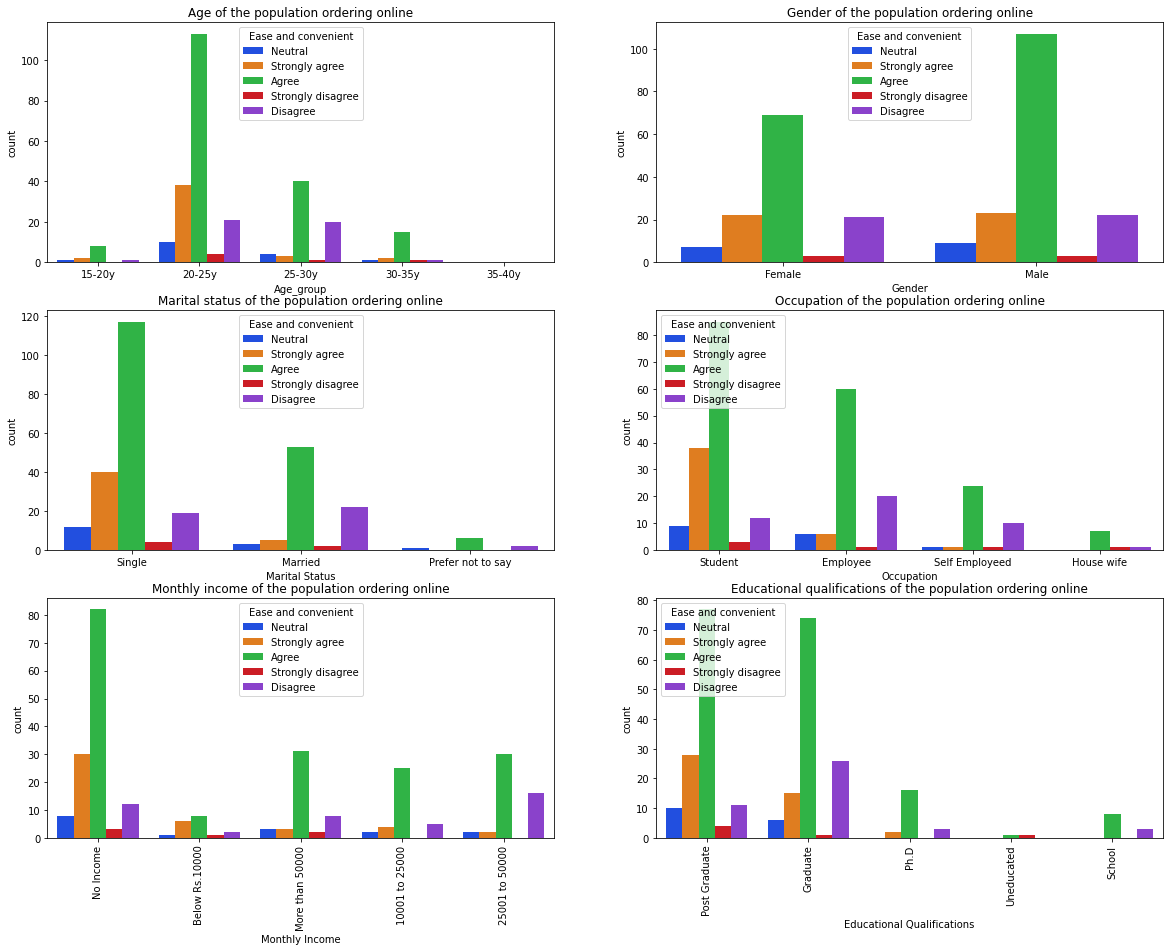

In [37]:
#Ease and convenient-

plt.figure(figsize=(20,15))

ax1=plt.subplot(3, 2, 1)
ax1=sns.countplot(food_delivery['Age_group'], hue=food_delivery["Ease and convenient"],data=food_delivery,palette="bright")
ax1.set_xticklabels(ax1.get_xticklabels())
plt.title('Age of the population ordering online')

ax2=plt.subplot(3, 2, 2)
ax2=sns.countplot(food_delivery['Gender'],hue=food_delivery["Ease and convenient"],data=food_delivery ,palette="bright")
ax2.set_xticklabels(ax2.get_xticklabels())
plt.title('Gender of the population ordering online')

ax3=plt.subplot(3, 2, 3)
ax3=sns.countplot(food_delivery['Marital Status'],hue=food_delivery["Ease and convenient"],data=food_delivery ,palette="bright")
ax3.set_xticklabels(ax3.get_xticklabels())
plt.title('Marital status of the population ordering online')

ax4=plt.subplot(3, 2, 4)
ax4=sns.countplot(food_delivery['Occupation'],hue=food_delivery["Ease and convenient"],data=food_delivery ,palette="bright")
ax4.set_xticklabels(ax4.get_xticklabels())
plt.title('Occupation of the population ordering online')


ax5=plt.subplot(3, 2, 5)
ax5=sns.countplot(food_delivery['Monthly Income'],hue=food_delivery["Ease and convenient"],data=food_delivery ,palette="bright")
ax5.set_xticklabels(ax5.get_xticklabels(),rotation=90)
plt.title('Monthly income of the population ordering online')

ax6=plt.subplot(3, 2, 6)
ax6=sns.countplot(food_delivery['Educational Qualifications'], hue=food_delivery["Ease and convenient"],data=food_delivery,palette="bright")
ax6.set_xticklabels(ax6.get_xticklabels(),rotation=90)
plt.title('Educational qualifications of the population ordering online')

plt.show()

Inference-

Ease and convenient is one of the most important things as agreed by all.The reason is that without this no one would like to order food online because one orders online to have food after a tiring day.

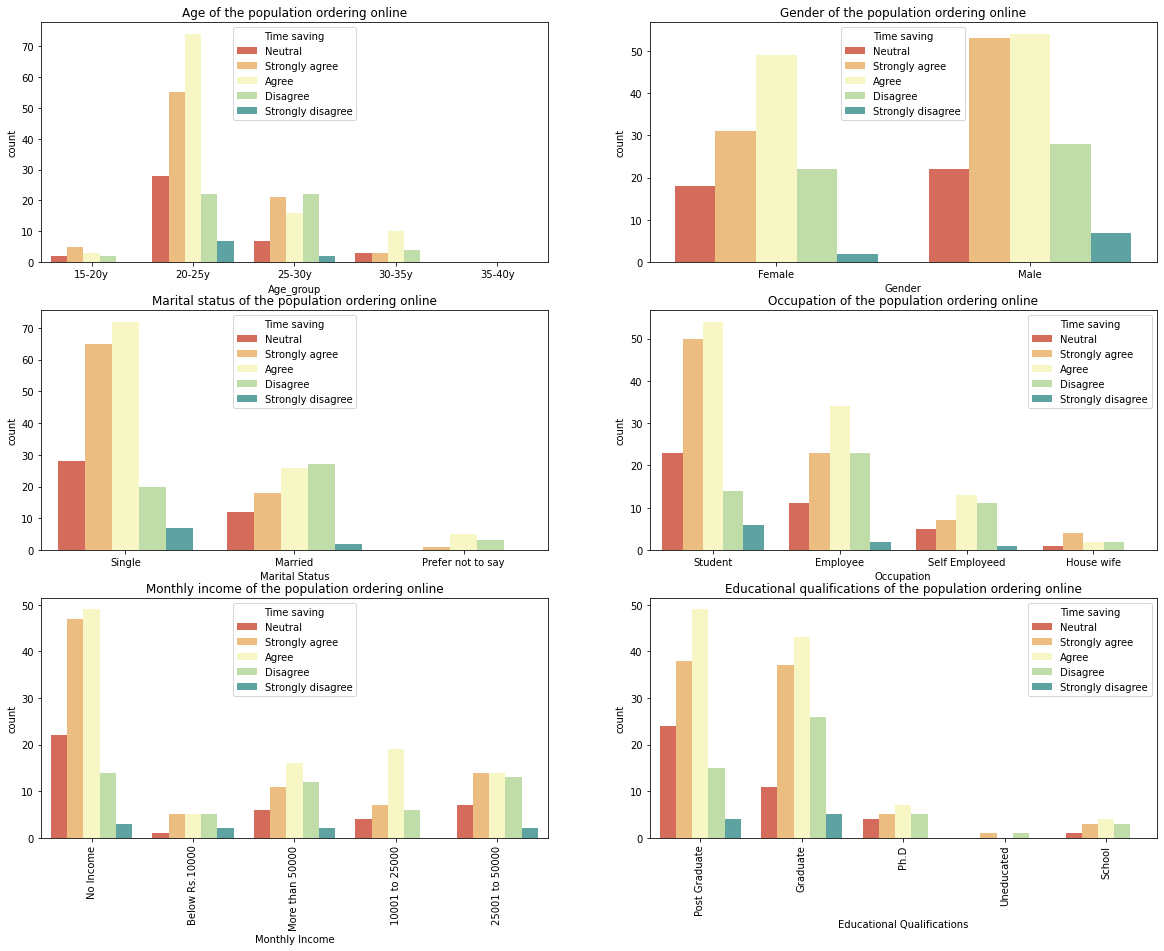

In [38]:
#time saving-

plt.figure(figsize=(20,15))


ax1=plt.subplot(3, 2, 1)
ax1=sns.countplot(food_delivery['Age_group'], hue=food_delivery["Time saving"],data=food_delivery,palette="Spectral")
ax1.set_xticklabels(ax1.get_xticklabels())
plt.title('Age of the population ordering online')


ax2=plt.subplot(3, 2, 2)
ax2=sns.countplot(food_delivery['Gender'],hue=food_delivery["Time saving"],data=food_delivery ,palette="Spectral")
ax2.set_xticklabels(ax2.get_xticklabels())
plt.title('Gender of the population ordering online')

ax3=plt.subplot(3, 2, 3)
ax3=sns.countplot(food_delivery['Marital Status'],hue=food_delivery["Time saving"],data=food_delivery ,palette="Spectral")
ax3.set_xticklabels(ax3.get_xticklabels())
plt.title('Marital status of the population ordering online')

ax4=plt.subplot(3, 2, 4)
ax4=sns.countplot(food_delivery['Occupation'],hue=food_delivery["Time saving"],data=food_delivery ,palette="Spectral")
ax4.set_xticklabels(ax4.get_xticklabels())
plt.title('Occupation of the population ordering online')


ax5=plt.subplot(3, 2, 5)
ax5=sns.countplot(food_delivery['Monthly Income'],hue=food_delivery["Time saving"],data=food_delivery ,palette="Spectral")
ax5.set_xticklabels(ax5.get_xticklabels(),rotation=90)
plt.title('Monthly income of the population ordering online')

ax6=plt.subplot(3, 2, 6)
ax6=sns.countplot(food_delivery['Educational Qualifications'], hue=food_delivery["Time saving"],data=food_delivery,palette="Spectral")
ax6.set_xticklabels(ax6.get_xticklabels(),rotation=90)
plt.title('Educational qualifications of the population ordering online')

plt.show()

Inference-

The existence of food delivery app was because to save time.As this fast generation wants to do all in a limited time span as it can be seen above that most agree on time savings.

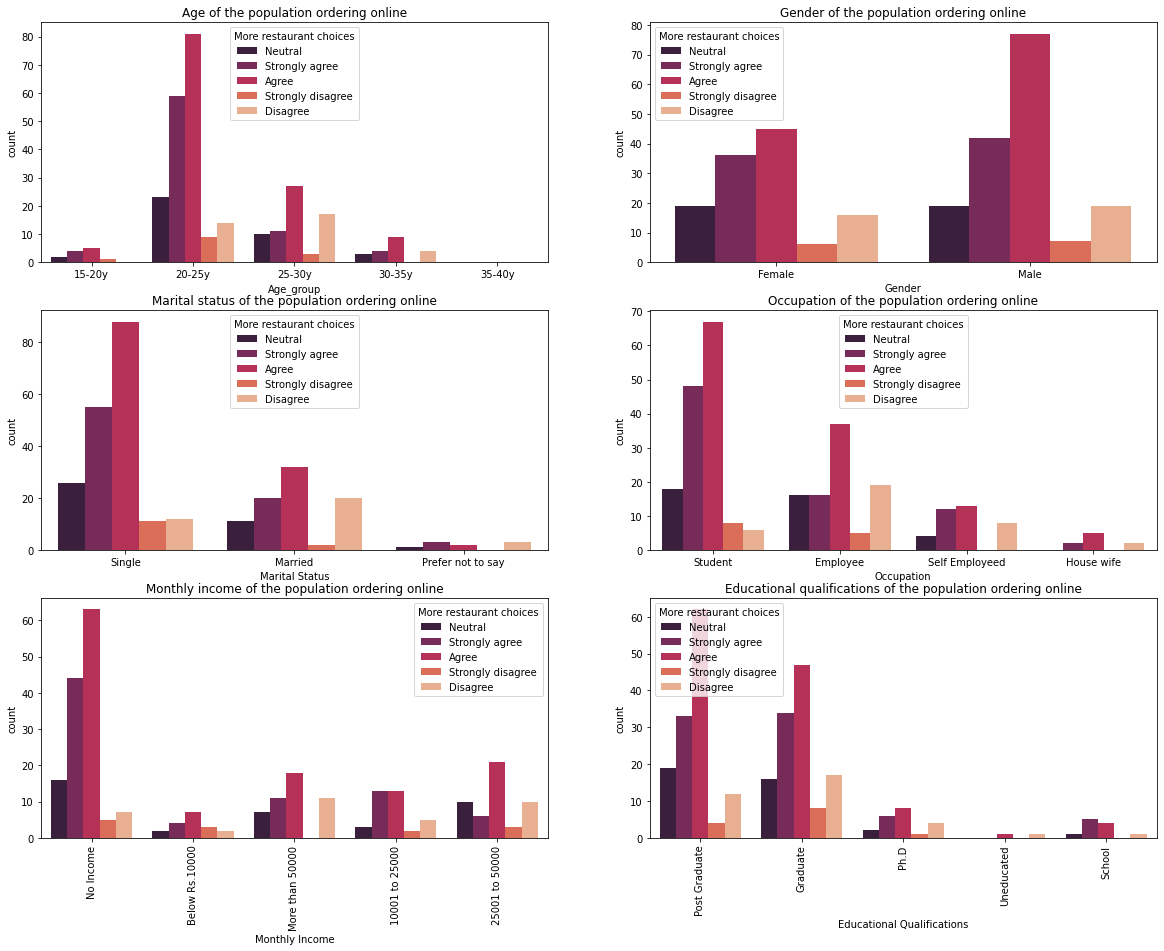

In [39]:
#restaurant choices-

plt.figure(figsize=(20,15))


ax1=plt.subplot(3, 2, 1)
ax1=sns.countplot(food_delivery['Age_group'], hue=food_delivery["More restaurant choices"],data=food_delivery,palette="rocket")
ax1.set_xticklabels(ax1.get_xticklabels())
plt.title('Age of the population ordering online')


ax2=plt.subplot(3, 2, 2)
ax2=sns.countplot(food_delivery['Gender'],hue=food_delivery["More restaurant choices"],data=food_delivery ,palette="rocket")
ax2.set_xticklabels(ax2.get_xticklabels())
plt.title('Gender of the population ordering online')

ax3=plt.subplot(3, 2, 3)
ax3=sns.countplot(food_delivery['Marital Status'],hue=food_delivery["More restaurant choices"],data=food_delivery ,palette="rocket")
ax3.set_xticklabels(ax3.get_xticklabels())
plt.title('Marital status of the population ordering online')

ax4=plt.subplot(3, 2, 4)
ax4=sns.countplot(food_delivery['Occupation'],hue=food_delivery["More restaurant choices"],data=food_delivery ,palette="rocket")
ax4.set_xticklabels(ax4.get_xticklabels())
plt.title('Occupation of the population ordering online')


ax5=plt.subplot(3, 2, 5)
ax5=sns.countplot(food_delivery['Monthly Income'],hue=food_delivery["More restaurant choices"],data=food_delivery ,palette="rocket")
ax5.set_xticklabels(ax5.get_xticklabels(),rotation=90)
plt.title('Monthly income of the population ordering online')

ax6=plt.subplot(3, 2, 6)
ax6=sns.countplot(food_delivery['Educational Qualifications'], hue=food_delivery["More restaurant choices"],data=food_delivery,palette="rocket")
ax6.set_xticklabels(ax6.get_xticklabels(),rotation=90)
plt.title('Educational qualifications of the population ordering online')

plt.show()

Inference-

The success of online food delivery app is because it offers foods from restaurants at one place which was not earlier.The same is shown by graphs above.

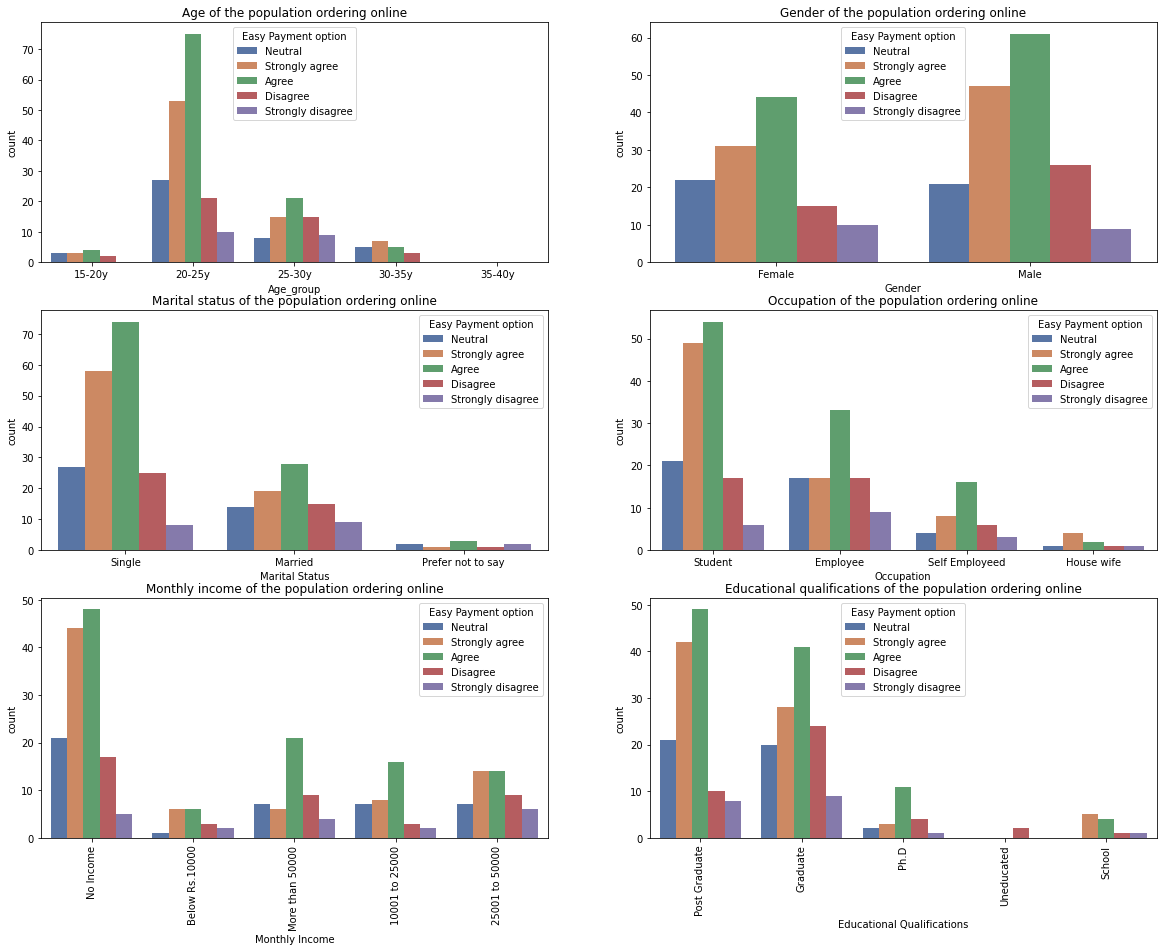

In [40]:
#Ease of payment option-

plt.figure(figsize=(20,15))


ax1=plt.subplot(3, 2, 1)
ax1=sns.countplot(food_delivery['Age_group'], hue=food_delivery["Easy Payment option"],data=food_delivery,palette="deep")
ax1.set_xticklabels(ax1.get_xticklabels())
plt.title('Age of the population ordering online')


ax2=plt.subplot(3, 2, 2)
ax2=sns.countplot(food_delivery['Gender'],hue=food_delivery["Easy Payment option"],data=food_delivery ,palette="deep")
ax2.set_xticklabels(ax2.get_xticklabels())
plt.title('Gender of the population ordering online')

ax3=plt.subplot(3, 2, 3)
ax3=sns.countplot(food_delivery['Marital Status'],hue=food_delivery["Easy Payment option"],data=food_delivery ,palette="deep")
ax3.set_xticklabels(ax3.get_xticklabels())
plt.title('Marital status of the population ordering online')

ax4=plt.subplot(3, 2, 4)
ax4=sns.countplot(food_delivery['Occupation'],hue=food_delivery["Easy Payment option"],data=food_delivery ,palette="deep")
ax4.set_xticklabels(ax4.get_xticklabels())
plt.title('Occupation of the population ordering online')


ax5=plt.subplot(3, 2, 5)
ax5=sns.countplot(food_delivery['Monthly Income'],hue=food_delivery["Easy Payment option"],data=food_delivery ,palette="deep")
ax5.set_xticklabels(ax5.get_xticklabels(),rotation=90)
plt.title('Monthly income of the population ordering online')

ax6=plt.subplot(3, 2, 6)
ax6=sns.countplot(food_delivery['Educational Qualifications'], hue=food_delivery["Easy Payment option"],data=food_delivery,palette="deep")
ax6.set_xticklabels(ax6.get_xticklabels(),rotation=90)
plt.title('Educational qualifications of the population ordering online')

plt.show()

Inference-

Now the maximum number of people have turned to cashless.The reason being covid-19 and the hassel of finding denominations of different numbers and rounding them to nearest number of the bill.

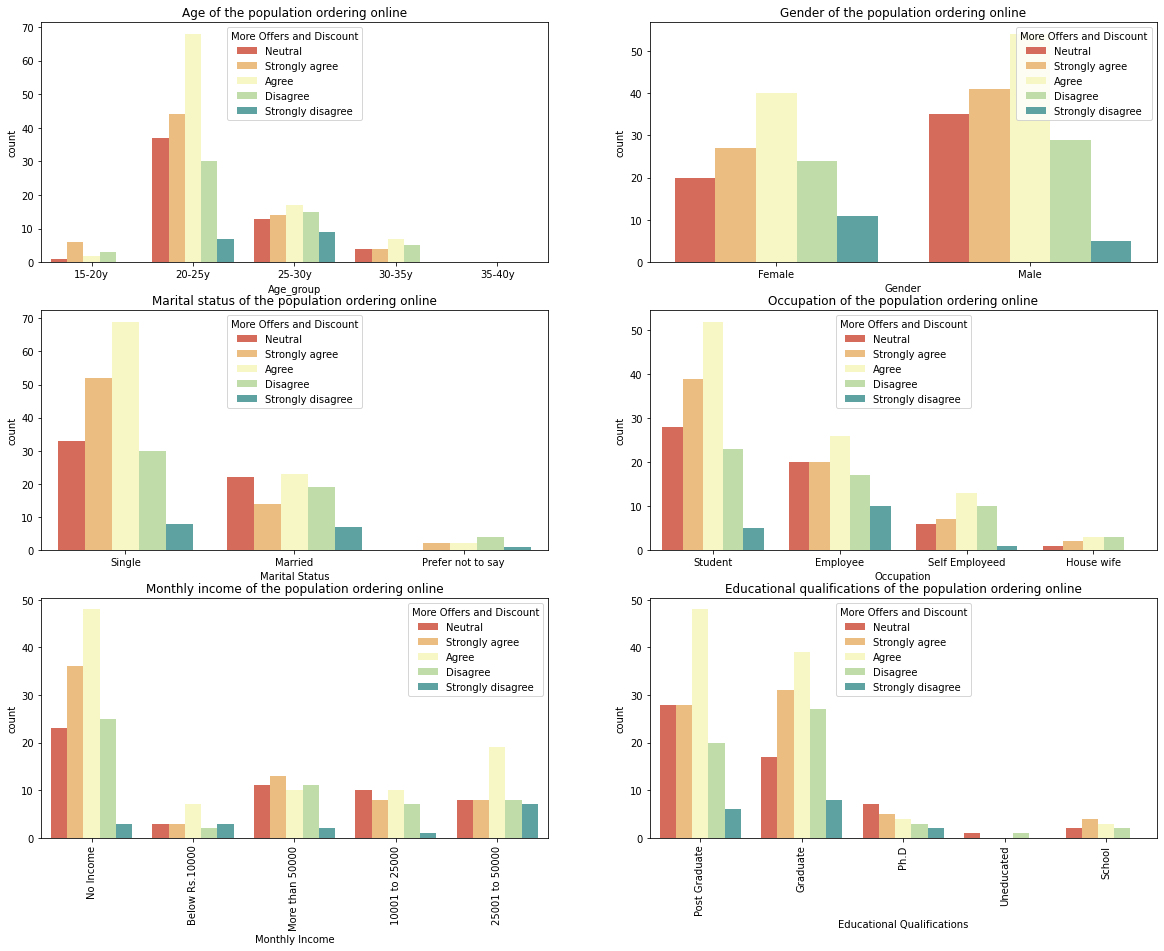

In [41]:
#Offers and discount-

plt.figure(figsize=(20,15))


ax1=plt.subplot(3, 2, 1)
ax1=sns.countplot(food_delivery['Age_group'], hue=food_delivery["More Offers and Discount"],data=food_delivery,palette="Spectral")
ax1.set_xticklabels(ax1.get_xticklabels())
plt.title('Age of the population ordering online')


ax2=plt.subplot(3, 2, 2)
ax2=sns.countplot(food_delivery['Gender'],hue=food_delivery["More Offers and Discount"],data=food_delivery ,palette="Spectral")
ax2.set_xticklabels(ax2.get_xticklabels())
plt.title('Gender of the population ordering online')

ax3=plt.subplot(3, 2, 3)
ax3=sns.countplot(food_delivery['Marital Status'],hue=food_delivery["More Offers and Discount"],data=food_delivery ,palette="Spectral")
ax3.set_xticklabels(ax3.get_xticklabels())
plt.title('Marital status of the population ordering online')

ax4=plt.subplot(3, 2, 4)
ax4=sns.countplot(food_delivery['Occupation'],hue=food_delivery["More Offers and Discount"],data=food_delivery ,palette="Spectral")
ax4.set_xticklabels(ax4.get_xticklabels())
plt.title('Occupation of the population ordering online')


ax5=plt.subplot(3, 2, 5)
ax5=sns.countplot(food_delivery['Monthly Income'],hue=food_delivery["More Offers and Discount"],data=food_delivery ,palette="Spectral")
ax5.set_xticklabels(ax5.get_xticklabels(),rotation=90)
plt.title('Monthly income of the population ordering online')

ax6=plt.subplot(3, 2, 6)
ax6=sns.countplot(food_delivery['Educational Qualifications'], hue=food_delivery["More Offers and Discount"],data=food_delivery,palette="Spectral")
ax6.set_xticklabels(ax6.get_xticklabels(),rotation=90)
plt.title('Educational qualifications of the population ordering online')

plt.show()

Inference-

Who does not love discounts and offers.

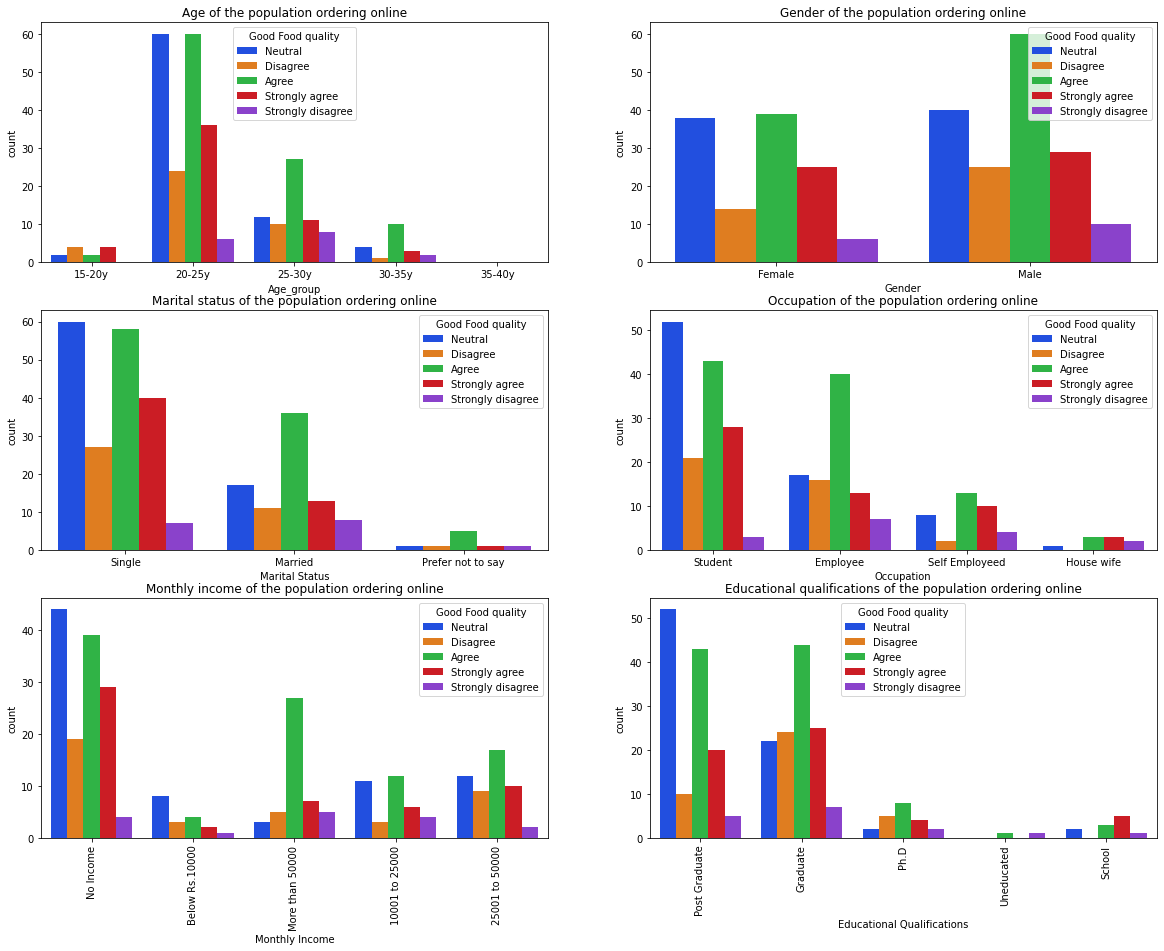

In [42]:
#Good food quality-

plt.figure(figsize=(20,15))


ax1=plt.subplot(3, 2, 1)
ax1=sns.countplot(food_delivery['Age_group'], hue=food_delivery["Good Food quality"],data=food_delivery,palette="bright")
ax1.set_xticklabels(ax1.get_xticklabels())
plt.title('Age of the population ordering online')


ax2=plt.subplot(3, 2, 2)
ax2=sns.countplot(food_delivery['Gender'],hue=food_delivery["Good Food quality"],data=food_delivery ,palette="bright")
ax2.set_xticklabels(ax2.get_xticklabels())
plt.title('Gender of the population ordering online')

ax3=plt.subplot(3, 2, 3)
ax3=sns.countplot(food_delivery['Marital Status'],hue=food_delivery["Good Food quality"],data=food_delivery ,palette="bright")
ax3.set_xticklabels(ax3.get_xticklabels())
plt.title('Marital status of the population ordering online')

ax4=plt.subplot(3, 2, 4)
ax4=sns.countplot(food_delivery['Occupation'],hue=food_delivery["Good Food quality"],data=food_delivery ,palette="bright")
ax4.set_xticklabels(ax4.get_xticklabels())
plt.title('Occupation of the population ordering online')


ax5=plt.subplot(3, 2, 5)
ax5=sns.countplot(food_delivery['Monthly Income'],hue=food_delivery["Good Food quality"],data=food_delivery ,palette="bright")
ax5.set_xticklabels(ax5.get_xticklabels(),rotation=90)
plt.title('Monthly income of the population ordering online')

ax6=plt.subplot(3, 2, 6)
ax6=sns.countplot(food_delivery['Educational Qualifications'], hue=food_delivery["Good Food quality"],data=food_delivery,palette="bright")
ax6.set_xticklabels(ax6.get_xticklabels(),rotation=90)
plt.title('Educational qualifications of the population ordering online')

plt.show()

Inference-

Quality of food should be good otherwise that restaurant and food delivery app will face consequences.

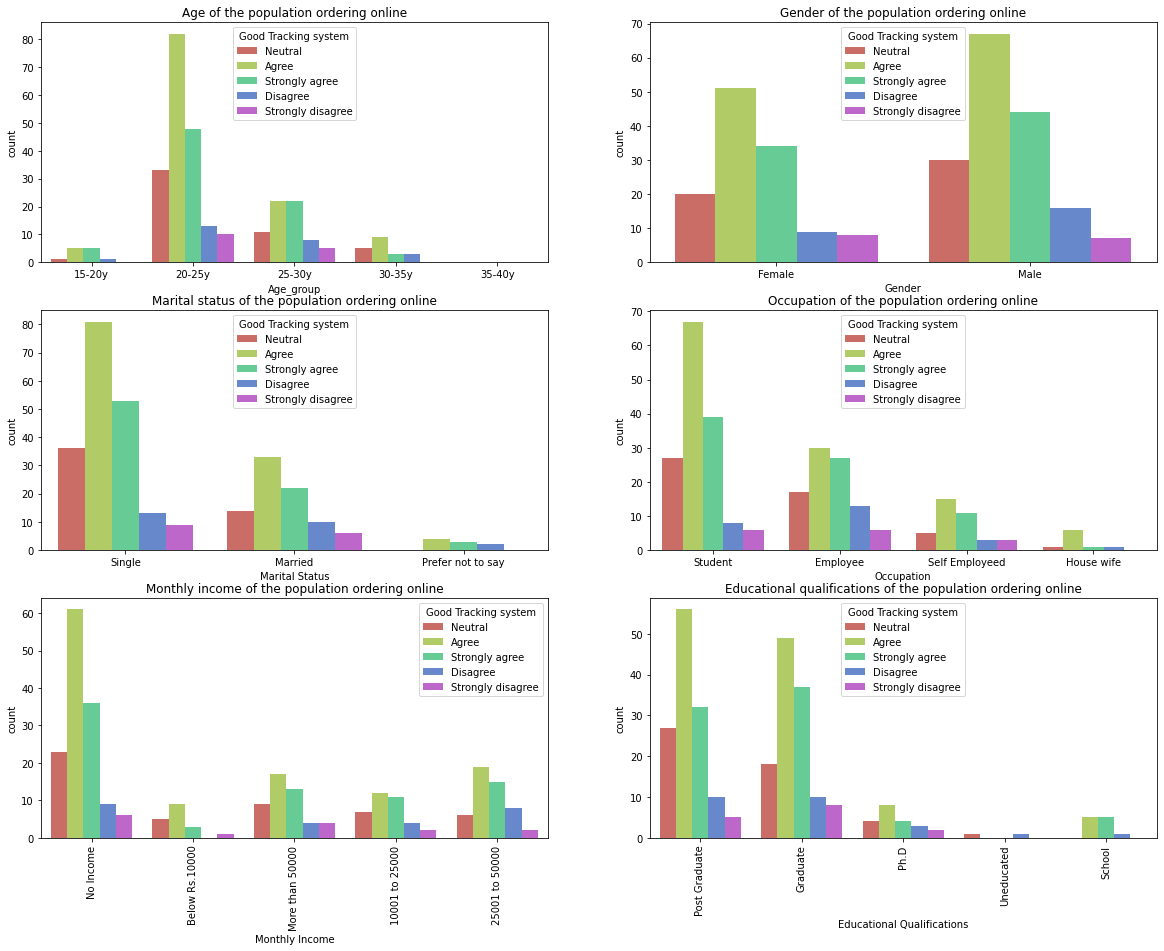

In [43]:
#Good tracking system-

plt.figure(figsize=(20,15))

ax1=plt.subplot(3, 2, 1)
ax1=sns.countplot(food_delivery['Age_group'], hue=food_delivery["Good Tracking system"],data=food_delivery,palette="hls")
ax1.set_xticklabels(ax1.get_xticklabels())
plt.title('Age of the population ordering online')


ax2=plt.subplot(3, 2, 2)
ax2=sns.countplot(food_delivery['Gender'],hue=food_delivery["Good Tracking system"],data=food_delivery ,palette="hls")
ax2.set_xticklabels(ax2.get_xticklabels())
plt.title('Gender of the population ordering online')

ax3=plt.subplot(3, 2, 3)
ax3=sns.countplot(food_delivery['Marital Status'],hue=food_delivery["Good Tracking system"],data=food_delivery ,palette="hls")
ax3.set_xticklabels(ax3.get_xticklabels())
plt.title('Marital status of the population ordering online')

ax4=plt.subplot(3, 2, 4)
ax4=sns.countplot(food_delivery['Occupation'],hue=food_delivery["Good Tracking system"],data=food_delivery ,palette="hls")
ax4.set_xticklabels(ax4.get_xticklabels())
plt.title('Occupation of the population ordering online')


ax5=plt.subplot(3, 2, 5)
ax5=sns.countplot(food_delivery['Monthly Income'],hue=food_delivery["Good Tracking system"],data=food_delivery ,palette="hls")
ax5.set_xticklabels(ax5.get_xticklabels(),rotation=90)
plt.title('Monthly income of the population ordering online')

ax6=plt.subplot(3, 2, 6)
ax6=sns.countplot(food_delivery['Educational Qualifications'], hue=food_delivery["Good Tracking system"],data=food_delivery,palette="hls")
ax6.set_xticklabels(ax6.get_xticklabels(),rotation=90)
plt.title('Educational qualifications of the population ordering online')

plt.show()

Inference-

The tracking system should be smooth and hassel free.Otherwise whole time will be spent on tracking it .

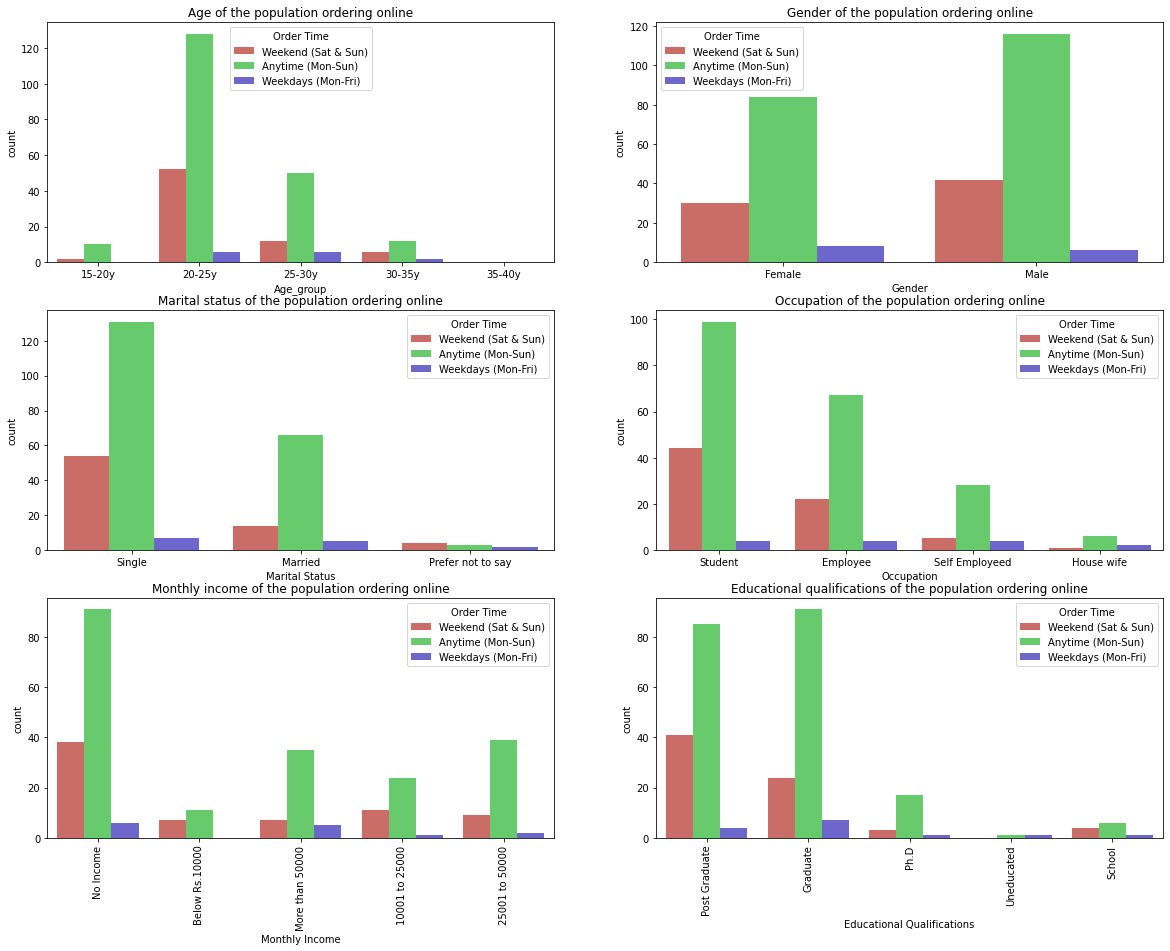

In [44]:
#order time-

plt.figure(figsize=(20,15))

ax1=plt.subplot(3, 2, 1)
ax1=sns.countplot(food_delivery['Age_group'], hue=food_delivery["Order Time"],data=food_delivery,palette="hls")
ax1.set_xticklabels(ax1.get_xticklabels())
plt.title('Age of the population ordering online')


ax2=plt.subplot(3, 2, 2)
ax2=sns.countplot(food_delivery['Gender'],hue=food_delivery["Order Time"],data=food_delivery ,palette="hls")
ax2.set_xticklabels(ax2.get_xticklabels())
plt.title('Gender of the population ordering online')

ax3=plt.subplot(3, 2, 3)
ax3=sns.countplot(food_delivery['Marital Status'],hue=food_delivery["Order Time"],data=food_delivery ,palette="hls")
ax3.set_xticklabels(ax3.get_xticklabels())
plt.title('Marital status of the population ordering online')

ax4=plt.subplot(3, 2, 4)
ax4=sns.countplot(food_delivery['Occupation'],hue=food_delivery["Order Time"],data=food_delivery ,palette="hls")
ax4.set_xticklabels(ax4.get_xticklabels())
plt.title('Occupation of the population ordering online')


ax5=plt.subplot(3, 2, 5)
ax5=sns.countplot(food_delivery['Monthly Income'],hue=food_delivery["Order Time"],data=food_delivery ,palette="hls")
ax5.set_xticklabels(ax5.get_xticklabels(),rotation=90)
plt.title('Monthly income of the population ordering online')

ax6=plt.subplot(3, 2, 6)
ax6=sns.countplot(food_delivery['Educational Qualifications'], hue=food_delivery["Order Time"],data=food_delivery,palette="hls")
ax6.set_xticklabels(ax6.get_xticklabels(),rotation=90)
plt.title('Educational qualifications of the population ordering online')

plt.show()

Inference-

Apetite knows no timing.So an online food delivery app success depends upon its ability to delivery food on any day.

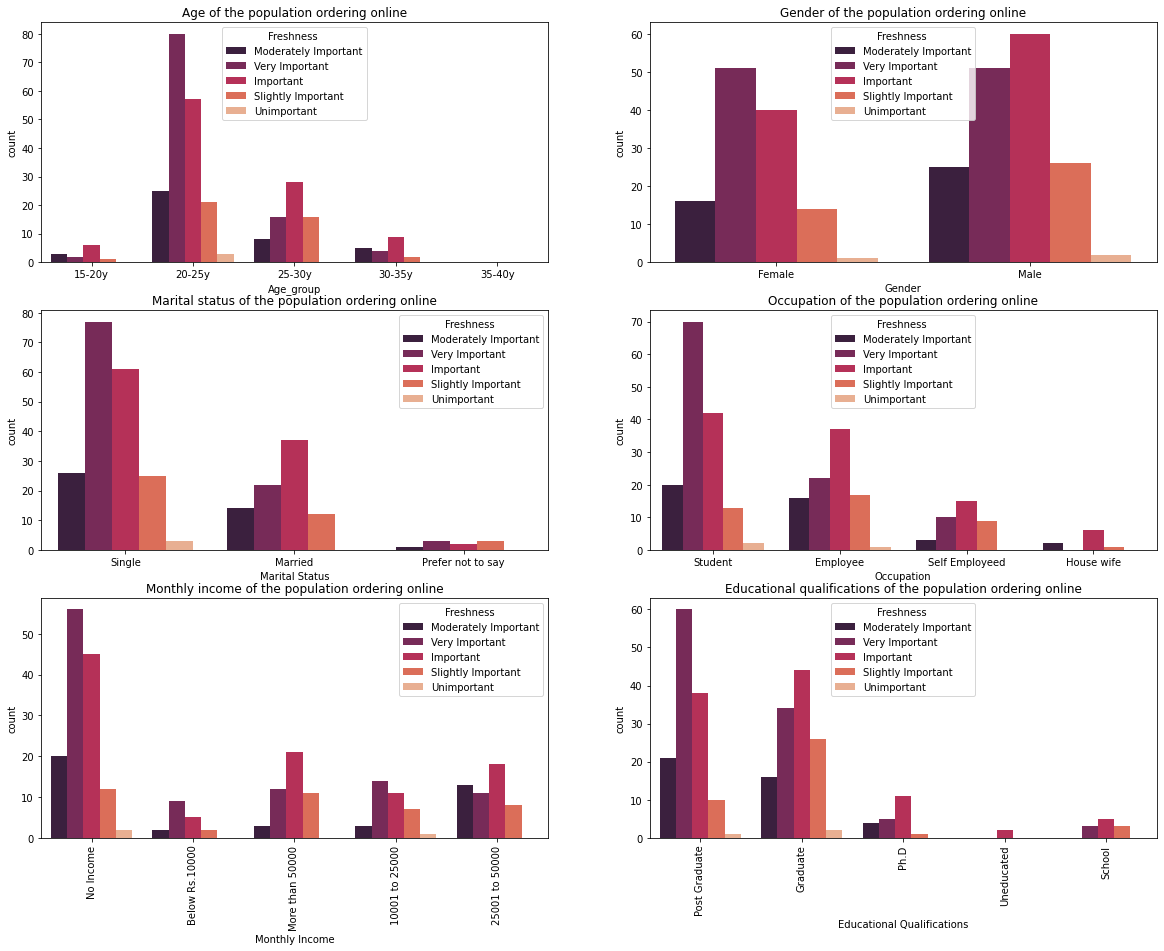

In [45]:
#Freshness-

plt.figure(figsize=(20,15))


ax1=plt.subplot(3, 2, 1)
ax1=sns.countplot(food_delivery['Age_group'], hue=food_delivery["Freshness "],data=food_delivery,palette="rocket")
ax1.set_xticklabels(ax1.get_xticklabels())
plt.title('Age of the population ordering online')


ax2=plt.subplot(3, 2, 2)
ax2=sns.countplot(food_delivery['Gender'],hue=food_delivery["Freshness "],data=food_delivery ,palette="rocket")
ax2.set_xticklabels(ax2.get_xticklabels())
plt.title('Gender of the population ordering online')

ax3=plt.subplot(3, 2, 3)
ax3=sns.countplot(food_delivery['Marital Status'],hue=food_delivery["Freshness "],data=food_delivery ,palette="rocket")
ax3.set_xticklabels(ax3.get_xticklabels())
plt.title('Marital status of the population ordering online')

ax4=plt.subplot(3, 2, 4)
ax4=sns.countplot(food_delivery['Occupation'],hue=food_delivery["Freshness "],data=food_delivery ,palette="rocket")
ax4.set_xticklabels(ax4.get_xticklabels())
plt.title('Occupation of the population ordering online')


ax5=plt.subplot(3, 2, 5)
ax5=sns.countplot(food_delivery['Monthly Income'],hue=food_delivery["Freshness "],data=food_delivery ,palette="rocket")
ax5.set_xticklabels(ax5.get_xticklabels(),rotation=90)
plt.title('Monthly income of the population ordering online')

ax6=plt.subplot(3, 2, 6)
ax6=sns.countplot(food_delivery['Educational Qualifications'], hue=food_delivery["Freshness "],data=food_delivery,palette="rocket")
ax6.set_xticklabels(ax6.get_xticklabels(),rotation=90)
plt.title('Educational qualifications of the population ordering online')

plt.show()

Inference-

Freshness of the food can make it more popular among individuals.

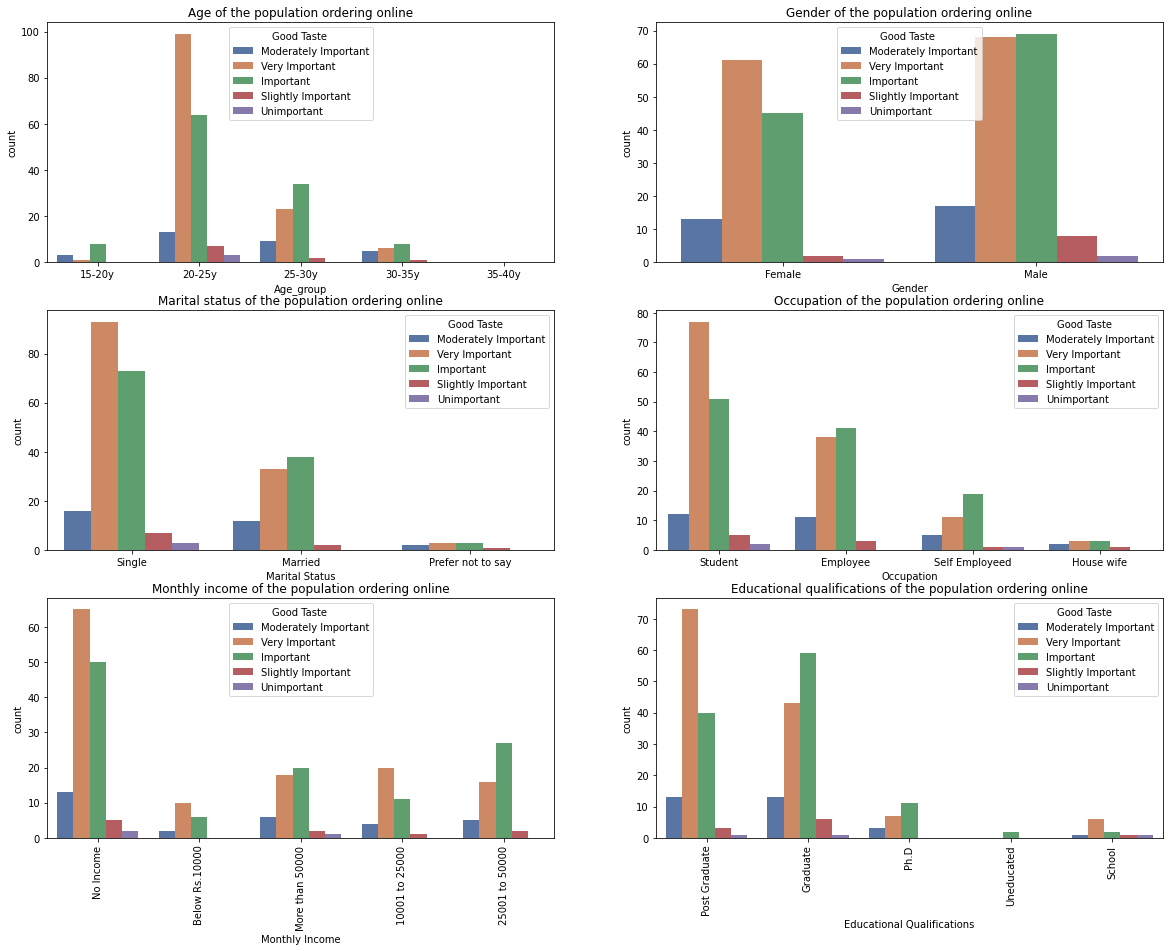

In [46]:
#Good taste-

plt.figure(figsize=(20,15))


ax1=plt.subplot(3, 2, 1)
ax1=sns.countplot(food_delivery['Age_group'], hue=food_delivery["Good Taste "],data=food_delivery,palette="deep")
ax1.set_xticklabels(ax1.get_xticklabels())
plt.title('Age of the population ordering online')


ax2=plt.subplot(3, 2, 2)
ax2=sns.countplot(food_delivery['Gender'],hue=food_delivery["Good Taste "],data=food_delivery ,palette="deep")
ax2.set_xticklabels(ax2.get_xticklabels())
plt.title('Gender of the population ordering online')

ax3=plt.subplot(3, 2, 3)
ax3=sns.countplot(food_delivery['Marital Status'],hue=food_delivery["Good Taste "],data=food_delivery ,palette="deep")
ax3.set_xticklabels(ax3.get_xticklabels())
plt.title('Marital status of the population ordering online')

ax4=plt.subplot(3, 2, 4)
ax4=sns.countplot(food_delivery['Occupation'],hue=food_delivery["Good Taste "],data=food_delivery ,palette="deep")
ax4.set_xticklabels(ax4.get_xticklabels())
plt.title('Occupation of the population ordering online')


ax5=plt.subplot(3, 2, 5)
ax5=sns.countplot(food_delivery['Monthly Income'],hue=food_delivery["Good Taste "],data=food_delivery ,palette="deep")
ax5.set_xticklabels(ax5.get_xticklabels(),rotation=90)
plt.title('Monthly income of the population ordering online')

ax6=plt.subplot(3, 2, 6)
ax6=sns.countplot(food_delivery['Educational Qualifications'], hue=food_delivery["Good Taste "],data=food_delivery,palette="deep")
ax6.set_xticklabels(ax6.get_xticklabels(),rotation=90)
plt.title('Educational qualifications of the population ordering online')

plt.show()

Inference-

Good taste is the ultimate variable that needs proper attention because the success of any food delivery business depends on it.If the food is not of good taste then nobody is going to order food from that.

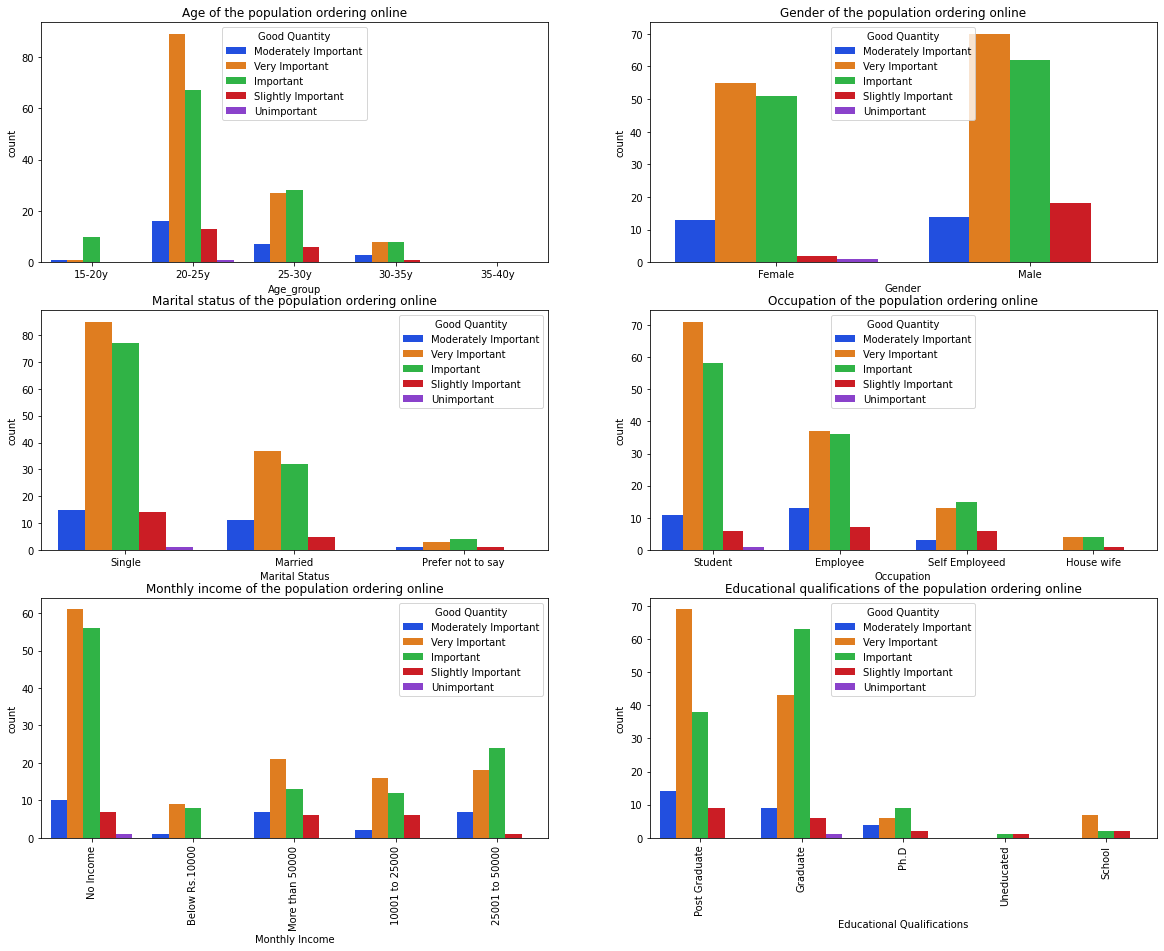

In [47]:
#Good quantity-

plt.figure(figsize=(20,15))


ax1=plt.subplot(3, 2, 1)
ax1=sns.countplot(food_delivery['Age_group'], hue=food_delivery["Good Quantity"],data=food_delivery,palette="bright")
ax1.set_xticklabels(ax1.get_xticklabels())
plt.title('Age of the population ordering online')


ax2=plt.subplot(3, 2, 2)
ax2=sns.countplot(food_delivery['Gender'],hue=food_delivery["Good Quantity"],data=food_delivery ,palette="bright")
ax2.set_xticklabels(ax2.get_xticklabels())
plt.title('Gender of the population ordering online')

ax3=plt.subplot(3, 2, 3)
ax3=sns.countplot(food_delivery['Marital Status'],hue=food_delivery["Good Quantity"],data=food_delivery ,palette="bright")
ax3.set_xticklabels(ax3.get_xticklabels())
plt.title('Marital status of the population ordering online')

ax4=plt.subplot(3, 2, 4)
ax4=sns.countplot(food_delivery['Occupation'],hue=food_delivery["Good Quantity"],data=food_delivery ,palette="bright")
ax4.set_xticklabels(ax4.get_xticklabels())
plt.title('Occupation of the population ordering online')


ax5=plt.subplot(3, 2, 5)
ax5=sns.countplot(food_delivery['Monthly Income'],hue=food_delivery["Good Quantity"],data=food_delivery ,palette="bright")
ax5.set_xticklabels(ax5.get_xticklabels(),rotation=90)
plt.title('Monthly income of the population ordering online')

ax6=plt.subplot(3, 2, 6)
ax6=sns.countplot(food_delivery['Educational Qualifications'], hue=food_delivery["Good Quantity"],data=food_delivery,palette="bright")
ax6.set_xticklabels(ax6.get_xticklabels(),rotation=90)
plt.title('Educational qualifications of the population ordering online')

plt.show()

Inference-

Good quantity of food makes customer happy and it acts as a push to order from that restaurant using the app.

In [48]:
#reviews-
fig = px.scatter_geo(food_delivery,lat='latitude',lon='longitude', hover_name="Reviews")
fig.update_layout(title = 'Online food delivery', title_x=0.5)
fig.show()

Inference-

The areas outside the main city should also be brought under the ambit of online food delivery app as nowadays maximum people are living there and those can act as an additional source of income.

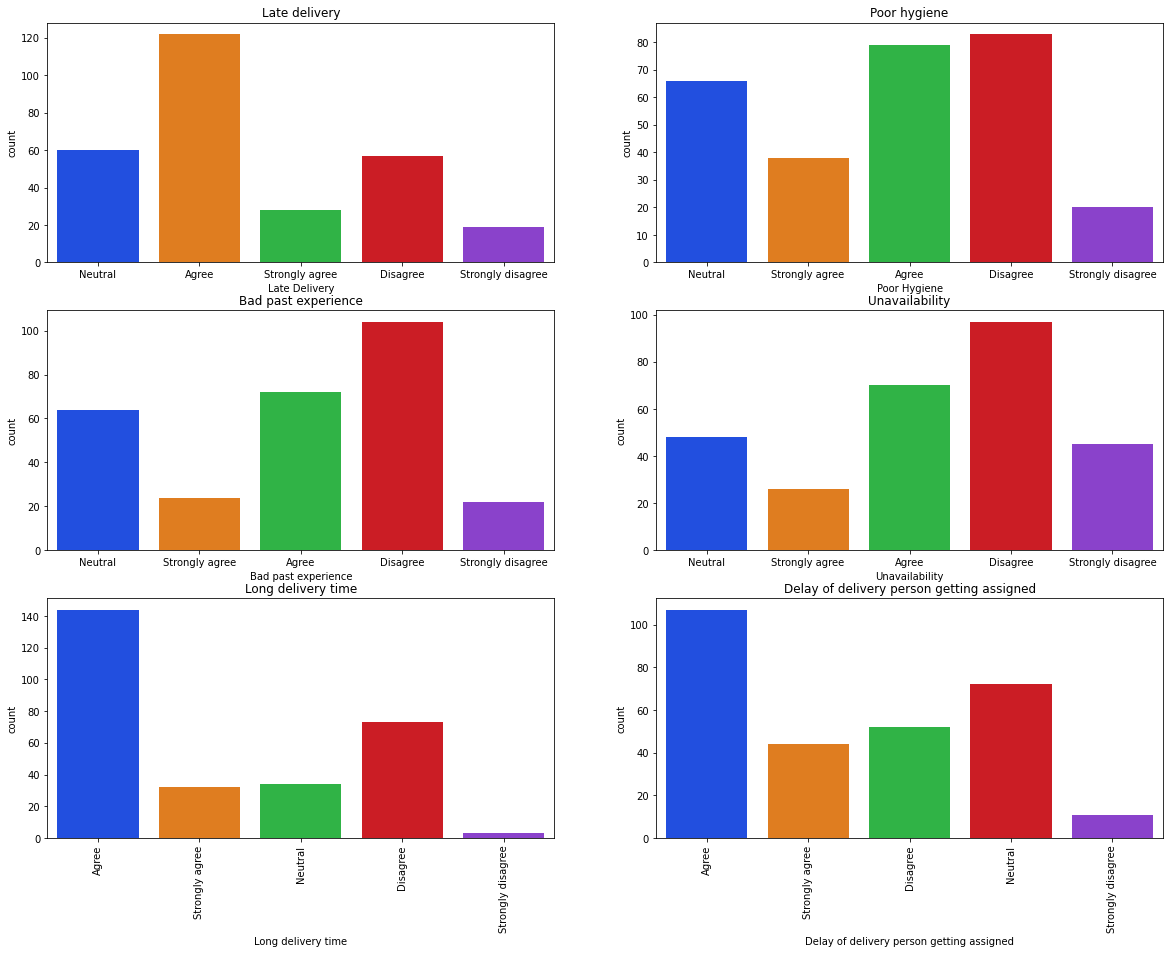

In [49]:
#late delivery-
plt.figure(figsize=(20,15))


ax1=plt.subplot(3, 2, 1)
ax1=sns.countplot(x=food_delivery['Late Delivery'],data=food_delivery,palette="bright")
ax1.set_xticklabels(ax1.get_xticklabels())
plt.title('Late delivery')


ax2=plt.subplot(3, 2, 2)
ax2=sns.countplot(food_delivery['Poor Hygiene'],data=food_delivery ,palette="bright")
ax2.set_xticklabels(ax2.get_xticklabels())
plt.title('Poor hygiene')

ax3=plt.subplot(3, 2, 3)
ax3=sns.countplot(food_delivery['Bad past experience'],data=food_delivery ,palette="bright")
ax3.set_xticklabels(ax3.get_xticklabels())
plt.title('Bad past experience')

ax4=plt.subplot(3, 2, 4)
ax4=sns.countplot(food_delivery['Unavailability'],data=food_delivery ,palette="bright")
ax4.set_xticklabels(ax4.get_xticklabels())
plt.title('Unavailability')


ax5=plt.subplot(3, 2, 5)
ax5=sns.countplot(food_delivery['Long delivery time'],data=food_delivery ,palette="bright")
ax5.set_xticklabels(ax5.get_xticklabels(),rotation=90)
plt.title('Long delivery time')

ax6=plt.subplot(3, 2, 6)
ax6=sns.countplot(food_delivery['Delay of delivery person getting assigned'],data=food_delivery,palette="bright")
ax6.set_xticklabels(ax6.get_xticklabels(),rotation=90)
plt.title('Delay of delivery person getting assigned')

plt.show()

Inference-

Late food delivery is that variable that cannot be ignored for a long.In this fast pace life there is no place for late people.So this variables needs to be close to zero to avoid any loss.

#### c) Factors outside the control of app-

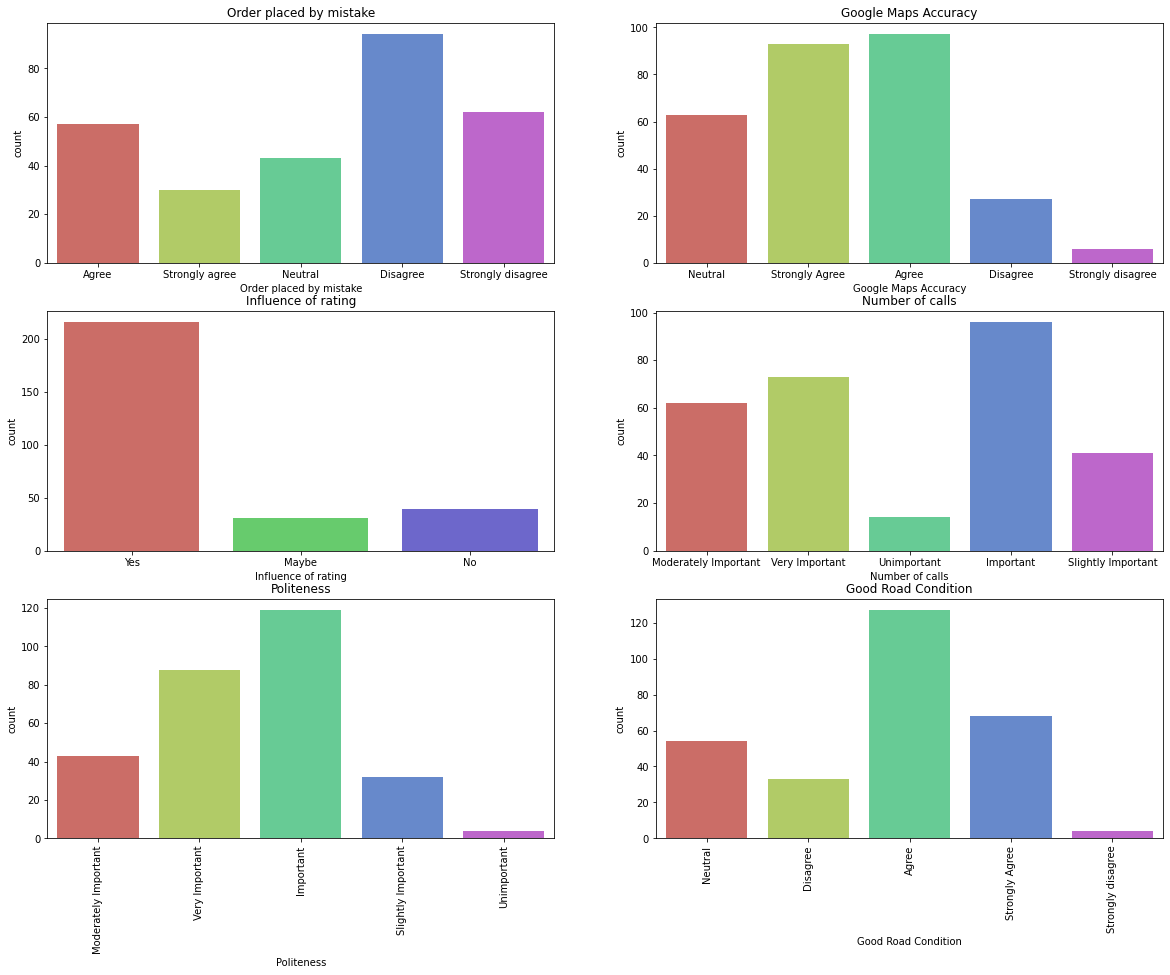

In [50]:
plt.figure(figsize=(20,15))


ax1=plt.subplot(3, 2, 1)
ax1=sns.countplot(food_delivery['Order placed by mistake'],data=food_delivery,palette="hls")
ax1.set_xticklabels(ax1.get_xticklabels())
plt.title('Order placed by mistake')


ax2=plt.subplot(3, 2, 2)
ax2=sns.countplot(food_delivery['Google Maps Accuracy'],data=food_delivery ,palette="hls")
ax2.set_xticklabels(ax2.get_xticklabels())
plt.title('Google Maps Accuracy')

ax3=plt.subplot(3, 2, 3)
ax3=sns.countplot(food_delivery['Influence of rating'],data=food_delivery ,palette="hls")
ax3.set_xticklabels(ax3.get_xticklabels())
plt.title('Influence of rating')

ax4=plt.subplot(3, 2, 4)
ax4=sns.countplot(food_delivery['Number of calls'],data=food_delivery ,palette="hls")
ax4.set_xticklabels(ax4.get_xticklabels())
plt.title('Number of calls')


ax5=plt.subplot(3, 2, 5)
ax5=sns.countplot(food_delivery['Politeness'],data=food_delivery ,palette="hls")
ax5.set_xticklabels(ax5.get_xticklabels(),rotation=90)
plt.title('Politeness')

ax6=plt.subplot(3, 2, 6)
ax6=sns.countplot(food_delivery['Good Road Condition'],data=food_delivery,palette="hls")
ax6.set_xticklabels(ax6.get_xticklabels(),rotation=90)
plt.title('Good Road Condition')

plt.show()

Order by mistake:
Google map accuracy:Customer or delivery agent not familiar with this app may lead to delay in food delivery.
Influence of rating:sometimes the customer give rating what others have given and not on their experience with the restaurant.
Number of calls:If the address is difficult to find then number of calls can increase and may cause unnecessary problem to customer and delivery agent.
Politeness:Whether the delivery person or customer is polite or not is unknown.
Good road condition:It helps in delivering food in short period of time and saving fuel price.But it depends on the address location of the customer.

### 4) Conclusion:

The success of any online food delivery app depends on three variables-

1)Customer-the apetite of customer leads to a business running successfully . So more ways and ideas should be thought about to make them order more.This should be the top most goal of the business owner.

2)Delivery Partners-They act as a mode of communication between a customer and the restaurant .So thinking about their well being is necessary for a business to flourish.

3)Restaurants-Their food is the one which has made this business turn into a profit making one.So they should come up with ideas to make it more customer centric.